In [1]:
import numpy as np
import argparse
import glob
import cv2
from matplotlib import pyplot as plt

In [2]:
def auto_canny(image, sig1, sig2):
    med = np.median(image)
    lower = int(max(0, (1.0 - sig1) * med))
    upper = int(min(255, (1.0 + sig2) * med))
    edged = cv2.Canny(image, lower, upper)
    
    return edged

In [3]:
def histogram(file):
    image = cv2.imread(file,1)
    Original = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray = cv2.imread(file,0)
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
        
    plt.subplots(figsize=(16,4))
    plt.subplot(131),plt.imshow(Original)#,cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(132),plt.imshow(gray, cmap = 'gray')
    plt.title('Gray'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(133), plt.plot(hist)
    plt.title('Gray Histogram')
    plt.xlim([-10,260])

In [10]:
def canny_image(file):
    gray = cv2.imread(file,0) #Don't need this if its a grayscale image
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
   
    for n in range (0, 100, 20):
        for m in range (0, 100, 20):
            Title = "Low = {} %, High = {} %".format(n,m)
            auto = auto_canny(blurred, n/100, m/100) # I'd like to take this and create a matrix of images
            plt.subplots(figsize=(7,7))
            plt.subplot(111),plt.imshow(auto,cmap = 'gray')
            plt.title(Title), plt.xticks([]), plt.yticks([])

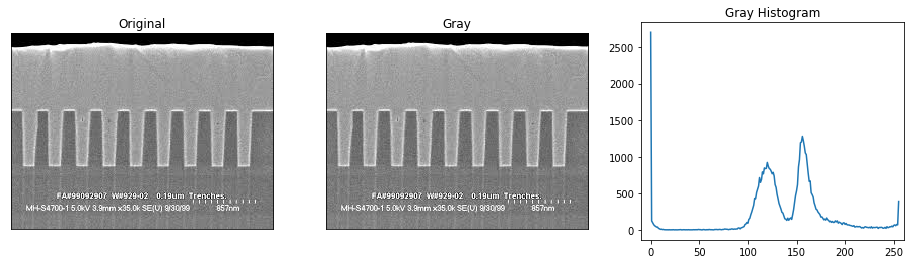

In [11]:
histogram('XSEM_trenches.jpg')

C:\Users\peter\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


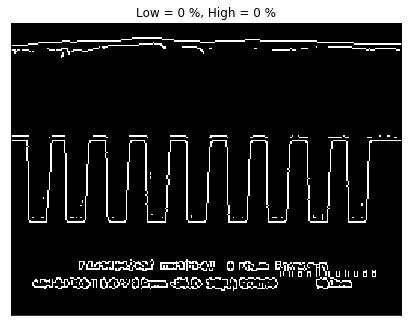

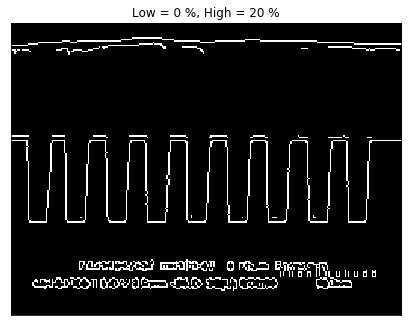

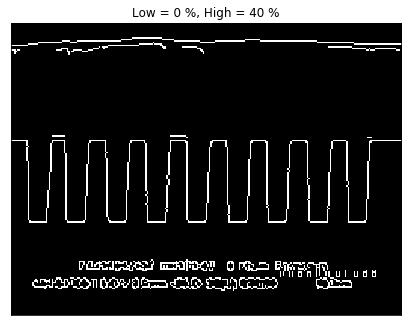

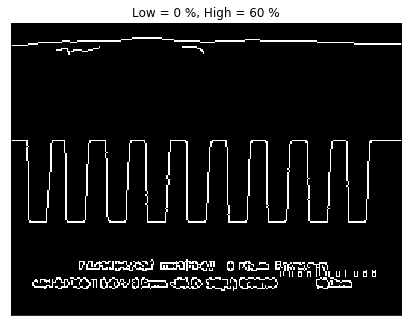

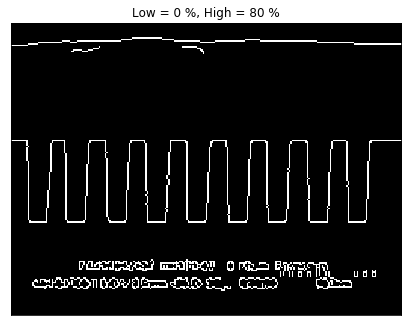

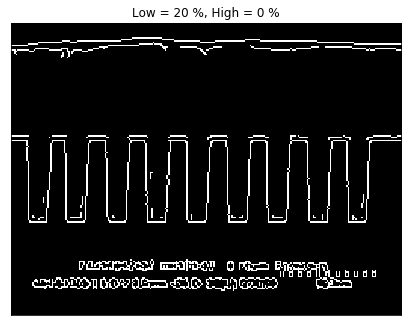

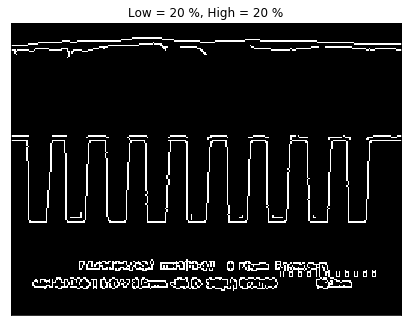

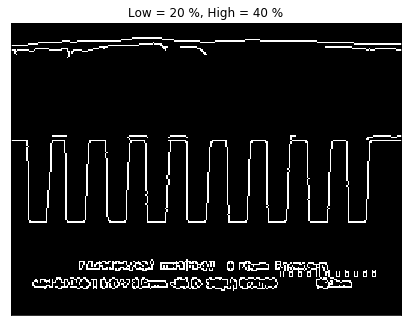

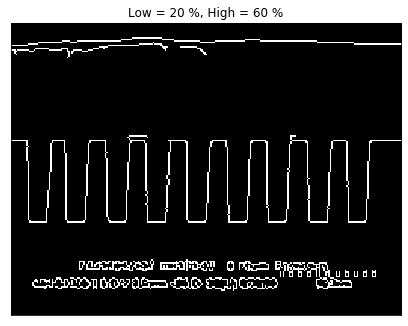

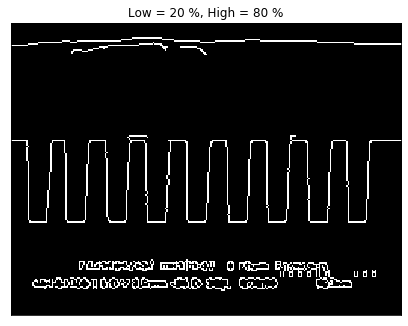

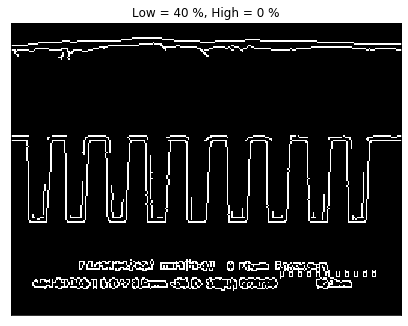

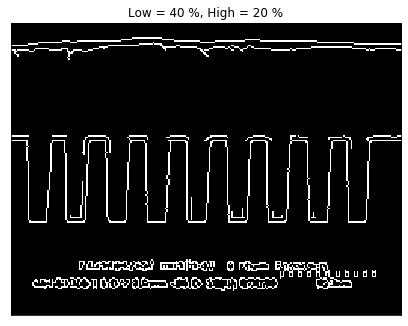

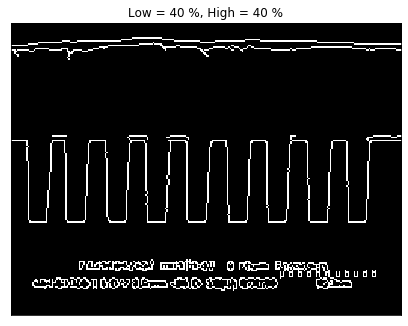

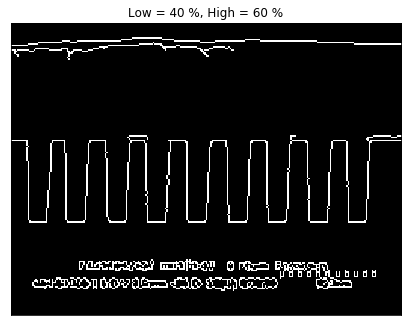

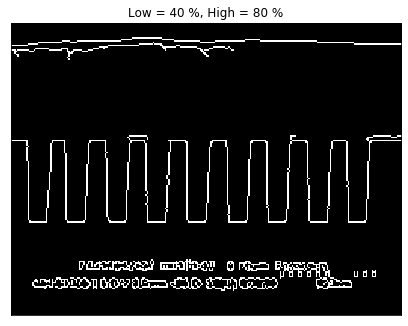

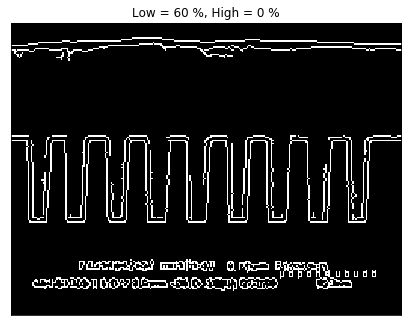

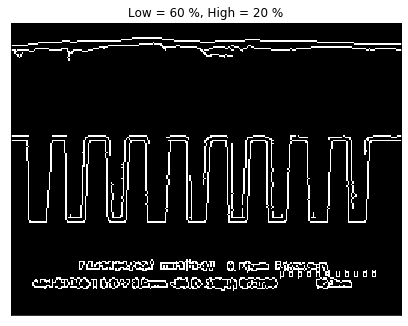

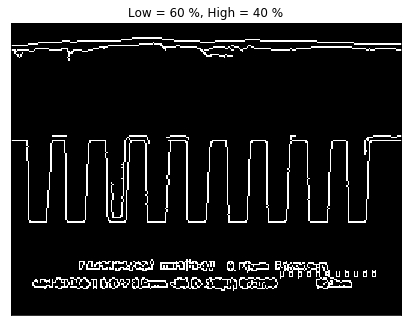

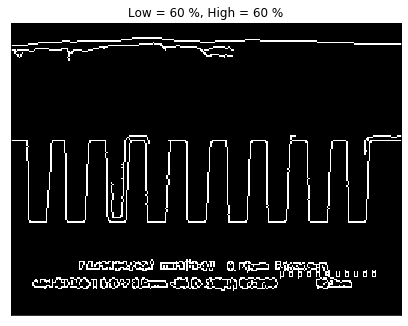

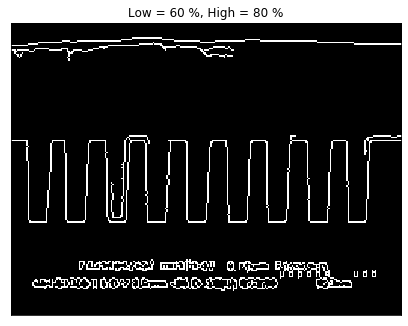

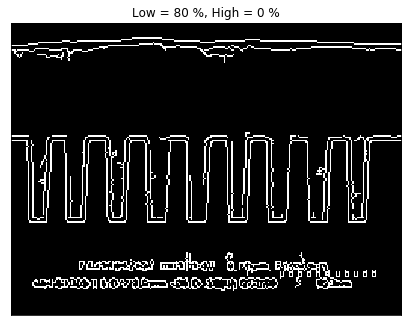

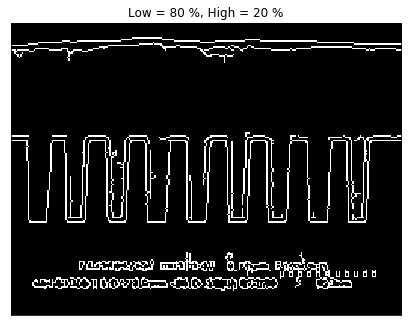

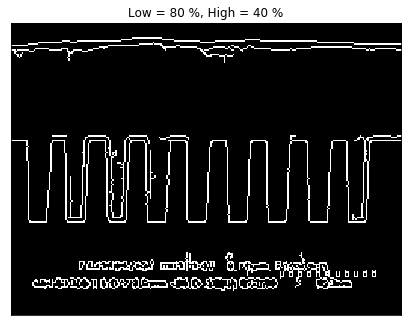

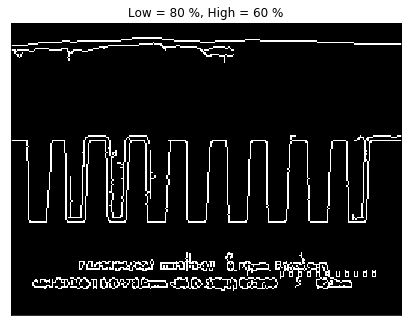

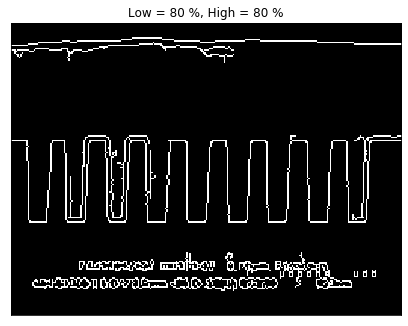

In [12]:
canny_image('XSEM_trenches.jpg')

In [ ]:
gray = cv2.imread('XSEM_trenches.jpg',0) #Don't need this if its a grayscale image
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
best = auto_canny(blurred, n/100, m/100) # I'd like to take this and create a matrix of images
plt.subplots(figsize=(8,8))
plt.subplot(111),plt.imshow(gray,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])